# <font  size="6" color='7A4CDE'> <b>Detecting Malicious and Benign Webpages </b></font> 


------------------
<font  size="6" color='7A4CDE'> <b>Overview </b></font> 

The goal of this project is to determine which pages that may be malicious based on the features of each pages. To achieving this goal, i started by loading the data to start understanded and do some cleaning and looking for which factors are most important in order to best classify pages,Also doing some visualization like heat map and pie chart to gain further insight.


* please open the file in jupyter notebook to see it in full format
--------------



<font  size="4" color='7A4CDE'> <b>Attributes of My Dataset </b></font> 

<font  size="2" color='7A4CDE'>1.</font>   <font  size="2" color='black'> url: URL of the Webpage.
    </font>	

<font  size="2" color='7A4CDE'> 2.</font>   <font  size="2" color='black'> url_len: Length of URL (count of characters in a URL).</font>	

<font  size="2" color='7A4CDE'> 3.</font>   <font  size="2" color='black'>ip_add: IP Address of the webpage.</font>	

<font  size="2" color='7A4CDE'> 4.</font>   <font  size="2" color='black'> geo_loc: Name of the country based on IP Address location.</font>	

<font  size="2" color='7A4CDE'> 5.</font>   <font  size="2" color='black'> tld: Top Level Domain of the webpage.</font>	

<font  size="2" color='7A4CDE'> 6.</font>   <font  size="2" color='black'> who_is: Gives out whether the WHO IS information of the registered domain is complete or incomplete.</font>	

<font  size="2" color='7A4CDE'> 7.</font>   <font  size="2" color='black'> https:	Gives out whether the website uses https or http protocol.</font>	

<font  size="2" color='7A4CDE'> 8.</font>   <font  size="2" color='black'> js_len: Length of JavaScript code (in KB) in the webpage.</font>	

<font  size="2" color='7A4CDE'> 9.</font>   <font  size="2" color='black'> js_obf_len: Length of Obfuscated JavaScript (in KB) in the webpage.</font>	


<font  size="2" color='7A4CDE'> 10.</font>   <font  size="2" color='black'> label: Classification label categorizing the webpage class as Malicious (bad) or Benign (good).</font>	

-----------------------------------

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
Data = pd.read_excel(r"C:\Users\96655\Desktop\MVP\Webpages_Dataset.xlsx")

In [97]:
## Observe the data to make sure it is properly loaded
Data.head()

,url_len,url,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,label
0,32,http://members.tripod.com/russiastation/,211.229.153.97,South Korea,com,incomplete,yes,47.0,0.0,bad
1,37,http://www.ddj.com/cpp/184403822,161.11.77.63,United States,com,complete,yes,117.0,0.0,good
2,70,http://www.naef-usa.com/,210.198.43.183,NaN,com,incomplete,yes,144.0,0.0,bad
3,42,http://www.ff-b2b.de/,50.138.83.15,United States,com,complete,yes,72.5,0.0,good
4,37,http://us.imdb.com/title/tt0176269/,201.29.133.18,Brazil,com,complete,yes,59.0,0.0,bad


In [98]:
# info give us summary of the date in glance
# we can see we have 10 feature with 9999 data points, 

# in colums geo_loc we have null value
# 7 colums are categorical
# 3 Columns are numerical
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   url_len     9999 non-null   int64  
 1   url         9999 non-null   object 
 2   ip_add      9999 non-null   object 
 3   geo_loc     9933 non-null   object 
 4   tld         9999 non-null   object 
 5   who_is      9999 non-null   object 
 6   https       9999 non-null   object 
 7   js_len      9999 non-null   float64
 8   js_obf_len  9999 non-null   float64
 9   label       9999 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 781.3+ KB


# Data cleaning 

In [99]:
# value_counts shows us how many value we have in each class
Data['label'].value_counts()

good    7979
bad     2020
Name: label, dtype: int64

-------------------

In [100]:
Data['geo_loc'].isnull().sum()

66

 in column <font  size="2" color='7A4CDE'> geo_loc, </font> there are 66 rows with null value, in this situation, imputing it with mode is not preferred because it will make wrong information and since the number of null rows is not so much, dropping the entire rows is the best chose.

In [101]:
Data = Data[Data['geo_loc'].notna()]

In [102]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9933 entries, 0 to 9998
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   url_len     9933 non-null   int64  
 1   url         9933 non-null   object 
 2   ip_add      9933 non-null   object 
 3   geo_loc     9933 non-null   object 
 4   tld         9933 non-null   object 
 5   who_is      9933 non-null   object 
 6   https       9933 non-null   object 
 7   js_len      9933 non-null   float64
 8   js_obf_len  9933 non-null   float64
 9   label       9933 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 853.6+ KB


-------------------------------------------

In [103]:
Data.head()

,url_len,url,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,label
0,32,http://members.tripod.com/russiastation/,211.229.153.97,South Korea,com,incomplete,yes,47.0,0.0,bad
1,37,http://www.ddj.com/cpp/184403822,161.11.77.63,United States,com,complete,yes,117.0,0.0,good
3,42,http://www.ff-b2b.de/,50.138.83.15,United States,com,complete,yes,72.5,0.0,good
4,37,http://us.imdb.com/title/tt0176269/,201.29.133.18,Brazil,com,complete,yes,59.0,0.0,bad
5,25,http://efilmcritic.com/hbs.cgi?movie=311,148.7.184.189,Singapore,com,complete,no,166.0,0.0,good


-------------------------


#### Since Machine learning algorithms can not handle categorical variables, we need to encoding them.

In [104]:
Data["https"].unique()

array(['yes', 'no'], dtype=object)

In [105]:
Data['https']=np.where(Data['https']=='yes',0,1)

Encoding the https Attribute

0 if the website with http protocol.

1 if the webpage with https protocol


----------------------

In [106]:
Data["who_is"].unique()

array(['incomplete', 'complete'], dtype=object)

In [107]:
Data['who_is']=np.where(Data['who_is']=='complete',0,1)

Encoding the who_is Attribute

0 if information of the registered domain is complete.

1 if information of the registered domain is incomplete



In [108]:
Data['geo_loc'].unique()

array(['South Korea', 'United States', 'Brazil', 'Singapore',
       'Switzerland', 'Portugal', 'Canada', 'China', 'Saudi Arabia',
       'Taiwan', 'United Kingdom', 'Bermuda', 'Russia', 'France',
       'Vietnam', 'Kenya', 'Venezuela', 'Luxembourg', 'Japan', 'Belgium',
       'Philippines', 'Morocco', 'Czechia', 'Grenada', 'Denmark',
       'Tunisia', 'Italy', 'Germany', 'Ireland', 'Hungary', 'Ghana',
       'New Zealand', 'Australia', 'South Africa', 'Ecuador',
       'United Arab Emirates', 'Egypt', 'Sri Lanka', 'Turkey', 'India',
       'Netherlands', 'Sweden', 'Finland', 'Hong Kong', 'Costa Rica',
       'Spain', 'Norway', 'Slovakia', 'Romania', 'Argentina', 'Indonesia',
       'Israel', 'Republic of Moldova', 'Mexico', 'Poland', 'Pakistan',
       'Ukraine', 'Algeria', 'Iran', 'Greece', 'Chile', 'Panama',
       'Cyprus', 'Bangladesh', 'Austria', 'Serbia', 'Kazakhstan',
       'Kyrgyzstan', 'Nigeria', 'Georgia', 'Hashemite Kingdom of Jordan',
       'Nicaragua', 'Uruguay', 'Malay

In [109]:
# encoding each geographical location with numerical encoding
Data['geo_loc'] = Data['geo_loc'] .astype('category')
Data['geo_loc'] = Data['geo_loc'].cat.codes

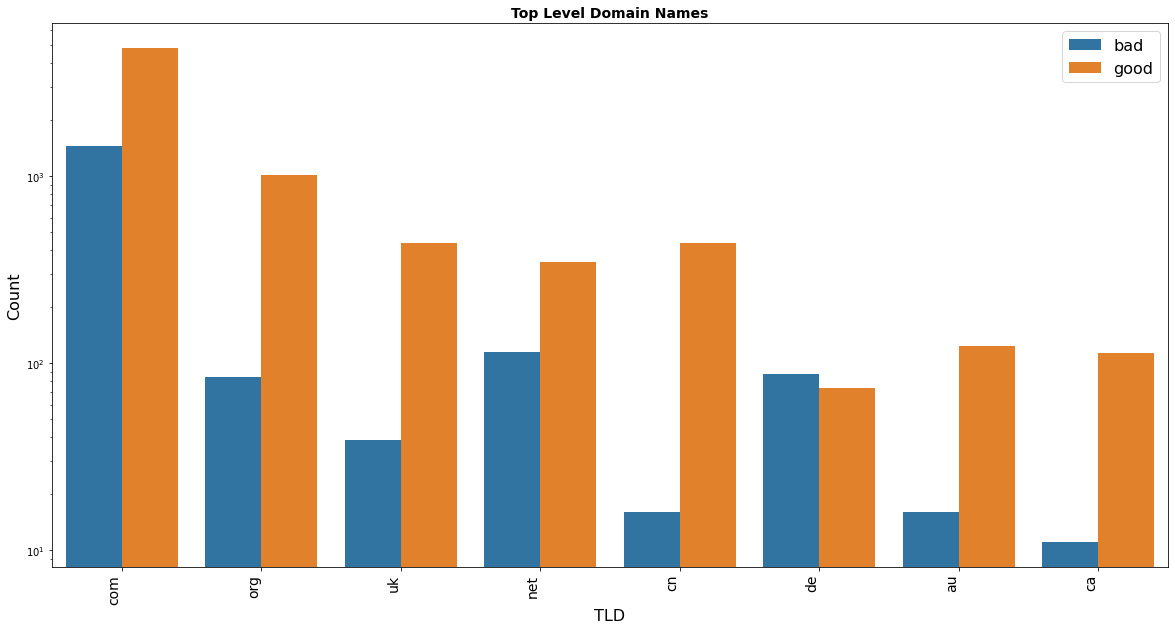

In [114]:
import re
def tld(s):
    p= re.split('\.',s)
    return p[-1]   
df_trial = Data.iloc[:,]
df_trial['tld']= df_trial['tld'].apply(tld)
df_trial['tld'].replace({'edu':'cn'},inplace=True)
df_trial= df_trial.groupby('tld').filter(lambda x : len(x)>100)
fig=plt.figure(figsize=(20,10))
ax = sns.countplot(x='tld',data=df_trial,hue='label',
                   order=df_trial['tld'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha="right",fontsize=14)
plt.title('Top Level Domain Names', fontsize=14, fontweight='bold')
ax.legend(loc='upper right',fontsize=16)
plt.xlabel('TLD',fontsize=16)
plt.ylabel('Count',fontsize=16)
ax.set_yscale("log")
plt.show()

## From Above char we can see how many bad and good pages for top level domains

In [18]:
Data['tld'] = Data['tld'] .astype('category')
Data['tld'] = Data['tld'].cat.codes

In [19]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9933 entries, 0 to 9998
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   url_len     9933 non-null   int64  
 1   url         9933 non-null   object 
 2   ip_add      9933 non-null   object 
 3   geo_loc     9933 non-null   int16  
 4   tld         9933 non-null   int16  
 5   who_is      9933 non-null   int32  
 6   https       9933 non-null   int32  
 7   js_len      9933 non-null   float64
 8   js_obf_len  9933 non-null   float64
 9   label       9933 non-null   object 
dtypes: float64(2), int16(2), int32(2), int64(1), object(3)
memory usage: 659.6+ KB


In [20]:
# Now after cleanning and encoding, the data ready to be trainng on the model

In [21]:
Data.tail()

,url_len,url,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,label
9994,47,http://www.billybear4kids.com/holidays/valenti...,183.30.162.103,25,39,1,1,739.8,399.492,bad
9995,26,http://www.mynevadacounty.com/sheriff/,72.232.194.198,130,39,1,1,610.2,475.956,bad
9996,46,http://guitar.about.com/library/weekly/aa10100...,87.36.244.101,57,39,1,1,531.0,260.190,bad
9997,24,http://www.languatek.com/,124.99.36.245,62,39,1,1,726.3,421.254,bad
9998,55,http://www.fansoflobo.com/,93.45.8.46,60,39,1,1,525.6,315.360,good


-----------------

# Data visualization

# Pie Chart

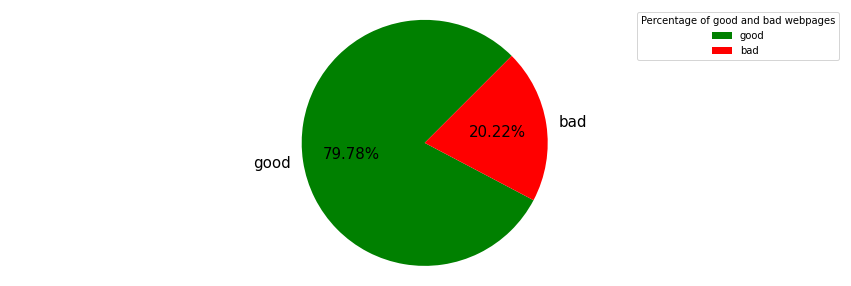

In [22]:
# Pie Chart of Malicious and Benign Webpages Distribution
labels = Data['label'].value_counts()
x =(list(labels.index), list(labels.values))
fig = plt.figure(figsize = (15,5))
Explode = [0,0.1]
plt.pie(x[1],labels=x[0],shadow=False,startangle=45,
        colors=['green','red'],autopct='%.2f%%',textprops={'fontsize': 15})
plt.axis('equal')
plt.legend(title='Percentage of good and bad webpages')
plt.show()

### As we can see from above visualisation of pie chart, this dataset has two class, Good and bad. approximatlay quarter  of the results is belong to bad pages

### the  dataset has significant class imbalance. So, during the machine learning process, we need to handle  this imbalance in order to get accurate results¶

# Heat map

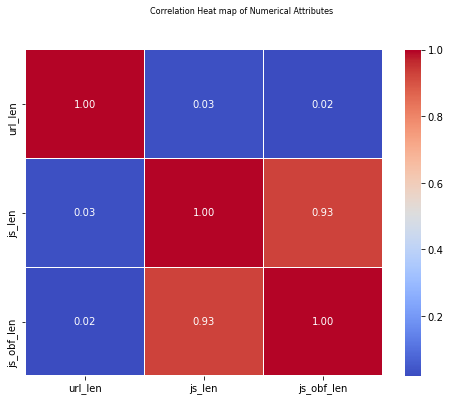

In [23]:
f, ax = plt.subplots(figsize=(8, 6))
corr = Data[['url_len','js_len','js_obf_len']].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
t= f.suptitle('Correlation Heat map of Numerical Attributes', fontsize=8)

#### From Above heat map, we see clearly 'js_len' and 'js_obf_len' are highly correlated and  very important feature in bulding the model

## Logistic Regression 

### Model Training

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [32]:

# as i mentioned above that the data is imbalanced, we need a way to handle this issue.
# RandomUnderSampler is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes. 
#Under-sample the majority class(es) by randomly picking samples with or without replacement.



from collections import Counter
from imblearn import under_sampling, over_sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler 
from imblearn.over_sampling import SMOTE
ros = RandomOverSampler(random_state=42)

x,y= ros.fit_resample(Data[['url_len','geo_loc','tld','who_is','https','js_len']], Data['label'])

print('Original dataset shape', Counter(x))
print('Resample dataset shape', Counter(y))

Original dataset shape Counter({'url_len': 1, 'geo_loc': 1, 'tld': 1, 'who_is': 1, 'https': 1, 'js_len': 1})
Resample dataset shape Counter({'bad': 7821, 'good': 7821})


In [33]:
Data.head()

,url_len,url,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,label
0,32,http://members.tripod.com/russiastation/,211.229.153.97,112,39,1,0,47.0,0.0,bad
1,37,http://www.ddj.com/cpp/184403822,161.11.77.63,130,39,0,0,117.0,0.0,good
3,25,http://www.ff-b2b.de/,50.138.83.15,108,39,0,1,166.0,0.0,good
4,29,http://us.imdb.com/title/tt0176269/,201.29.133.18,117,39,0,0,127.5,0.0,bad
5,25,http://efilmcritic.com/hbs.cgi?movie=311,148.7.184.189,95,39,0,0,42.5,0.0,bad


In [34]:
x_train, x_test, y_train, y_test = train_test_split(Data[['url_len','geo_loc','tld','who_is','https','js_len']],Data['label'], test_size=0.20, random_state=0,shuffle =True)

In [35]:
lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

### Model Validation

In [36]:
lg_y_predict = lg.predict(x_test)
print('Accuracy of logistic regression classifier: {:.2f}'.format(lg.score(x_test, y_test)))

Accuracy of logistic regression classifier: 0.96


[[ 357   87]
 [   2 1541]]


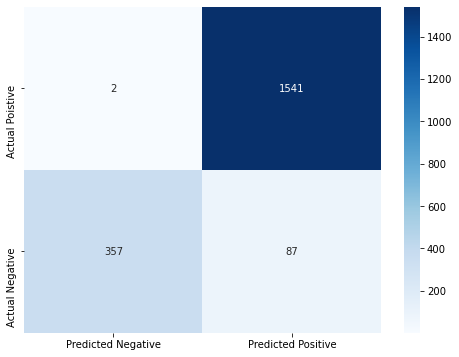

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, lg_y_predict)
print(confusion_matrix)

# Plotting the confusion matrix
cfm= confusion_matrix
lbl1=["Predicted Negative", "Predicted Positive"]
lbl2=["Actual Negative", "Actual Poistive"]
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
ax.set_ylim([0,2])
plt.show()

## From above confusion matrix i can see my model doing good in  prediction
## type error 1 (FP) and type error 2 (FN) is very small

In [39]:
print(classification_report(y_test, lg_y_predict))

              precision    recall  f1-score   support

         bad       0.99      0.80      0.89       444
        good       0.95      1.00      0.97      1543

    accuracy                           0.96      1987
   macro avg       0.97      0.90      0.93      1987
weighted avg       0.96      0.96      0.95      1987



## the logestic regression has an accuracy of 0.96 and F1 score of 0.89 for bad class and 0.97 for good class 
## this result is very good and the model is performing well

## Random Forest

### Model Training

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(Data[['url_len','geo_loc','tld','who_is','https','js_len']],Data['label'], test_size=0.20, random_state=0,shuffle =True)

In [42]:
clf = RandomForestClassifier(n_estimators=100)

clf.fit(x_train,Y_train)

# prediction on test set
RF_y_predict=clf.predict(X_test)

### Model Validation

In [43]:
print("Accuracy of Random Forest classifier :",metrics.accuracy_score(Y_test, RF_y_predict))

Accuracy of Random Forest classifier : 0.9637644690488173


[[ 377   67]
 [   5 1538]]


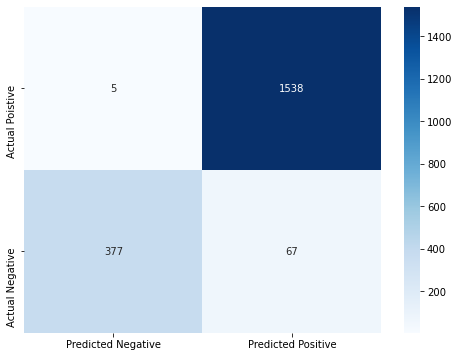

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, RF_y_predict)
print(confusion_matrix)

# Plotting the confusion matrix
cfm= confusion_matrix
lbl1=["Predicted Negative", "Predicted Positive"]
lbl2=["Actual Negative", "Actual Poistive"]
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
ax.set_ylim([0,2])
plt.show()

## From above confusion matrix for the second model i build, i can see my model is doing  good as well in  prediction
## type error 1 (FP) and type error 2 (FN) is very small

In [45]:
print(metrics.classification_report(Y_test, RF_y_predict))

              precision    recall  f1-score   support

         bad       0.99      0.85      0.91       444
        good       0.96      1.00      0.98      1543

    accuracy                           0.96      1987
   macro avg       0.97      0.92      0.94      1987
weighted avg       0.96      0.96      0.96      1987



## the Random Forest has an accuracy of 0.96 and F1 score of 0.91 for bad class and 0.98 for good class
## this result is very good and the model is performing well

# Conclusion

## The evaluation using Random Forest Classifier and logistic regression gives good result in term of accuracy. but in classification_report that show us the other evaluation measures , the random forest is better than logistic regression 

## in overall both model performing well and give us excellent result

--------------------

thank you 